In [101]:
import os
import numpy as np
import pandas as pd
from PIL import Image

sdir = r'D:\computer\Level7\new\Machine\project\10000\10000'

filepaths = []
labels = []
data = []  # To store the processed 784-dimensional image vectors

classlist = os.listdir(sdir)
class_index = 0

for klass in classlist:
    classpath = os.path.join(sdir, klass)
    flist = os.listdir(classpath)
    
    for f in flist:
        fpath = os.path.join(classpath, f)
        filepaths.append(fpath)
        labels.append(class_index)
        
        # Process the image
        with Image.open(fpath) as img:
            img = img.convert('L')  # Convert to grayscale
            img_resized = img.resize((28, 28))  # Ensure size is 28x28
            img_array = np.array(img_resized).flatten()  # Flatten to 1D vector
            img_array = img_array / 255.0  # Normalize to [0, 1]
            data.append(img_array)  # Append the processed data
    
    class_index += 1

# Create a DataFrame
data_df = pd.DataFrame(data)  # Image data as 784 columns
data_df['labels'] = labels  # Add labels

print(data_df.head())  # Print the first few rows
print('DataFrame length:', len(data_df))

# Check the class balance
balance = data_df['labels'].value_counts()
print(balance)


KeyboardInterrupt: 

In [253]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Data Preprocessing
sdir = r'D:\computer\Level7\new\Machine\project\10000\10000'
filepaths = []
labels = []
data = []

classlist = os.listdir(sdir)
class_index = 0

for klass in classlist:
    classpath = os.path.join(sdir, klass)
    flist = os.listdir(classpath)
    
    for f in flist:
        fpath = os.path.join(classpath, f)
        filepaths.append(fpath)
        labels.append(class_index)
        
        # Process the image
        with Image.open(fpath) as img:
            img = img.convert('L')  # Convert to grayscale
            img_resized = img.resize((28, 28))  # Ensure size is 28x28
            img_array = np.array(img_resized).flatten()  # Flatten to 1D vector
            img_array = img_array / 255.0  # Normalize to [0, 1]
            data.append(img_array)
    
    class_index += 1

# Create a DataFrame
data = np.array(data)
labels = np.array(labels)

# Convert labels to categorical
labels_categorical = to_categorical(labels)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)

In [157]:
# Hyperparameters
num_neurons_layer1 = 512
num_neurons_layer2 = 256
dropout_rate = 0.45
learning_rate = 0.001
batch_size = 10000
epochs = 400

In [230]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD

# Define the model
model = Sequential()
model.add(Input(shape=(784,)))  # Input layer for flattened 28x28 grayscale images
model.add(Dense(256, activation='relu'))  # First hidden layer
model.add(Dense(128, activation='relu'))  # Second hidden layer
model.add(Dense(len(classlist), activation='softmax'))  # Output layer with number of classes

# Compile the Model
model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=0.009),  # Stochastic Gradient Descent with momentum
              metrics=['accuracy'])

# Print Model Summary
model.summary()


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_217 (Dense)               │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [231]:
history = model.fit(X_train, y_train, 
                    epochs=2000, 
                    batch_size=2000, 
                    validation_data=(X_test, y_test)
                    )

Epoch 1/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.1032 - loss: 2.4894 - val_accuracy: 0.1050 - val_loss: 2.3456
Epoch 2/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1181 - loss: 2.3299 - val_accuracy: 0.1175 - val_loss: 2.3054
Epoch 3/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1277 - loss: 2.2966 - val_accuracy: 0.1185 - val_loss: 2.2890
Epoch 4/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1313 - loss: 2.2830 - val_accuracy: 0.1325 - val_loss: 2.2793
Epoch 5/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1425 - loss: 2.2747 - val_accuracy: 0.1425 - val_loss: 2.2724
Epoch 6/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1543 - loss: 2.2682 - val_accuracy: 0.1585 - val_loss: 2.2660
Epoch 7/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1723 - loss: 2.2613 - val_accuracy: 0.1745 - val_loss: 2.2601
Epoch 8/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1863 - loss: 2.2556 - val_accuracy: 0.1875 - 

In [247]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD

# Define the model
model = Sequential()
model.add(Input(shape=(784,)))  # Input layer for flattened 28x28 grayscale images
model.add(Dense(512, activation='relu'))  # Increased neurons in the first hidden layer
model.add(Dropout(0.5))  # Add dropout to reduce overfitting
model.add(Dense(256, activation='relu'))  # Second hidden layer
model.add(Dropout(0.5))  # Add dropout to reduce overfitting
model.add(Dense(len(classlist), activation='softmax'))  # Output layer with number of classes

# Compile the Model
model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=0.005, momentum=0.9),  # Lower learning rate and use Nesterov momentum
              metrics=['accuracy'])

# Print Model Summary
model.summary()


Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_235 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_236 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_237 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [248]:
history = model.fit(X_train, y_train, 
                    epochs=3000,  # Reduced epochs for faster convergence; adjust as needed
                    batch_size=4000,  # Smaller batch size for more updates per epoch
                    validation_data=(X_test, y_test)
                    )

Epoch 1/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - accuracy: 0.0948 - loss: 2.7951 - val_accuracy: 0.1170 - val_loss: 2.3780
Epoch 2/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.0965 - loss: 2.6830 - val_accuracy: 0.1240 - val_loss: 2.3187
Epoch 3/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.1055 - loss: 2.5395 - val_accuracy: 0.1235 - val_loss: 2.3255
Epoch 4/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.1045 - loss: 2.4962 - val_accuracy: 0.1125 - val_loss: 2.3335
Epoch 5/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.1021 - loss: 2.4717 - val_accuracy: 0.1145 - val_loss: 2.3218
Epoch 6/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.1066 - loss: 2.4131 - val_accuracy: 0.1245 - val_loss: 2.3024
Epoch 7/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.1106 - loss: 2.3760 - val_accuracy: 0.1360 - val_loss: 2.2872
Epoch 8/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.1080 - loss: 2.3507 - val_accuracy: 0.

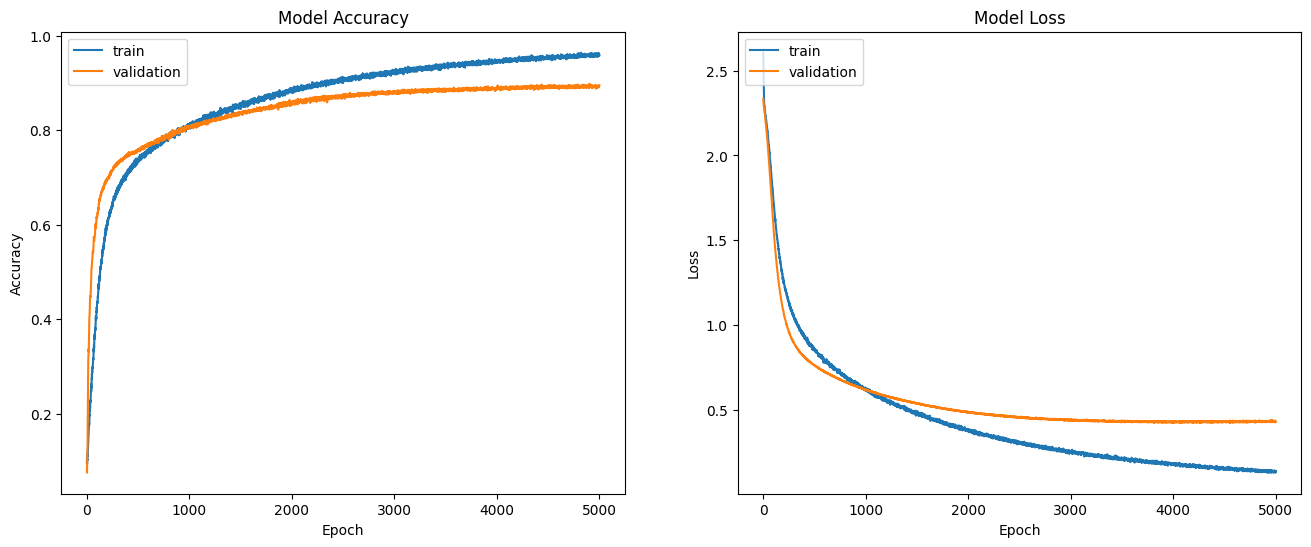

In [245]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(16,6))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['train', 'validation'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['train', 'validation'], loc='upper left')

plt.show()



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8918 - loss: 0.4466
Test Loss: 0.4260588586330414
Test Accuracy: 0.8949999809265137


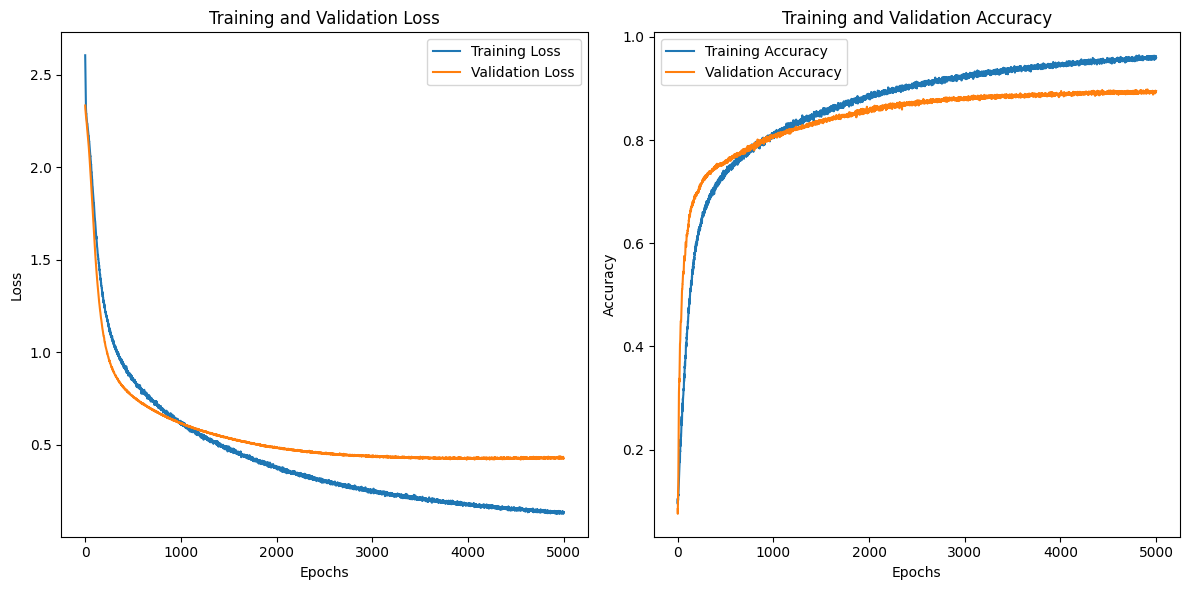

In [246]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [256]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
import pickle

# Reload the Model Structure
model = Sequential()
model.add(Input(shape=(784,)))  # Input layer for flattened 28x28 grayscale images
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Load Weights
with open("NeuralNetwork.pkl", "rb") as f:
    weights = pickle.load(f)
model.set_weights(weights)

# Compile the Model (necessary for prediction)
model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=0.005, momentum=0.9), 
              metrics=['accuracy'])

# Function to preprocess an input image
def preprocess_image(image_path):
    """
    Preprocesses an image for prediction.
    Converts to grayscale, resizes to 28x28, normalizes, and flattens it.
    """
    with Image.open(image_path) as img:
        img = img.convert('L')  # Convert to grayscale
        img_resized = img.resize((28, 28))  # Resize to 28x28
        img_array = np.array(img_resized).flatten()  # Flatten the image
        img_array = img_array / 255.0  # Normalize to [0, 1]
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict Function
def predict_image(image_path):
    """
    Predicts the class of the image at the given path.
    """
    # Preprocess the image
    image_data = preprocess_image(image_path)
    
    # Predict using the model
    prediction = model.predict(image_data)
    
    # Get the predicted class
    predicted_class = np.argmax(prediction)
    
    return predicted_class, prediction

# Example usage
image_path = r'D:\computer\Level7\new\Machine\project\10000\10000\1\1_968.jpg'  # Update with your image path
predicted_class, probabilities = predict_image(image_path)

# Output the result
print(f"Predicted Class Index: {predicted_class}")
print(f"Class Probabilities: {probabilities}")

# Map index to class name
print(f"Predicted Class Name: {classlist[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predicted Class Index: 1
Class Probabilities: [[5.7798250e-08 9.9848866e-01 5.9673411e-10 3.8564363e-10 9.6321514e-07
  1.5989754e-10 5.5481482e-09 1.5077267e-03 2.1586774e-10 2.4641497e-06]]
Predicted Class Name: 1


Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1007 - loss: 2.6522 - val_accuracy: 0.1085 - val_loss: 2.3431
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.0986 - loss: 2.5995 - val_accuracy: 0.1115 - val_loss: 2.3226
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.1029 - loss: 2.5404 - val_accuracy: 0.1055 - val_loss: 2.3101
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.1011 - loss: 2.4910 - val_accuracy: 0.1190 - val_loss: 2.3028
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.1035 - loss: 2.4385 - val_accuracy: 0.1370 - val_loss: 2.2951
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.0999 - loss: 2.4049 - val_accuracy: 0.1510 - val_loss: 2.2883
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.1090 - loss: 2.3670 - val_accuracy: 0.1640 - val_loss: 2.2833
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.1032 - loss: 2.3504 - val_accuracy: 0.1715 - val_

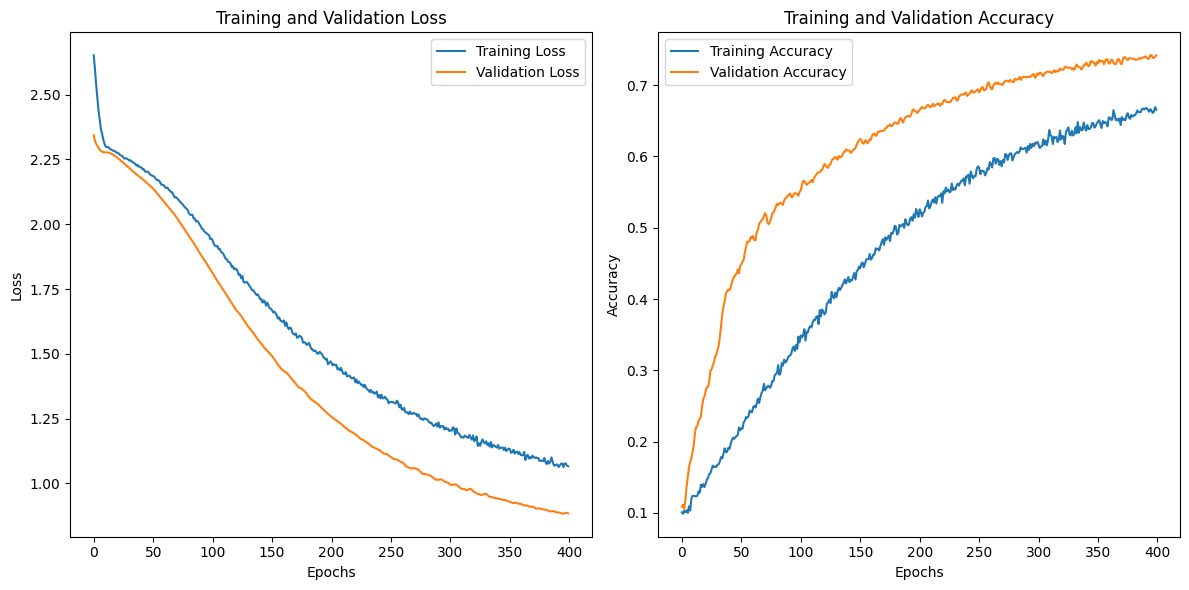

In [72]:
import matplotlib.pyplot as plt

# Train the Model
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_test, y_test))

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [250]:
import pickle

# Save the model weights as a .pkl file
weights = model.get_weights()  # Get the weights of the model

with open("NeuralNetwork.pkl", "wb") as f:
    pickle.dump(weights, f)

In [2]:
data_df['labels'].value_counts()


labels
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: count, dtype: int64

In [5]:
print(data_df.dtypes)


0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
780       float64
781       float64
782       float64
783       float64
labels      int64
Length: 785, dtype: object


In [12]:
data_df.to_csv('mnist_dataset.csv')

print("Dataset saved as 'mnist_dataset.csv'")

Dataset saved as 'mnist_dataset.csv'


In [3]:
data_df.info

<bound method DataFrame.info of              0         1         2         3         4         5         6  \
0     0.627451  0.658824  0.654902  0.627451  0.635294  0.647059  0.639216   
1     0.549020  0.470588  0.243137  0.101961  0.211765  0.415686  0.533333   
2     0.686275  0.682353  0.674510  0.674510  0.674510  0.674510  0.682353   
3     0.741176  0.717647  0.741176  0.764706  0.725490  0.658824  0.650980   
4     0.435294  0.262745  0.113725  0.286275  0.443137  0.454902  0.454902   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.635294  0.400000  0.627451  0.678431  0.666667  0.713725  0.658824   
9996  0.607843  0.623529  0.647059  0.670588  0.654902  0.690196  0.470588   
9997  0.701961  0.686275  0.686275  0.694118  0.698039  0.694118  0.682353   
9998  0.678431  0.678431  0.682353  0.686275  0.674510  0.682353  0.694118   
9999  0.745098  0.674510  0.694118  0.690196  0.678431  0.670588  0.678431   

             7         8       

In [ ]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming the data is already loaded as in your script
# You have the DataFrame data_df with image data in 784 columns and labels

# Convert data to numpy array and labels
X = np.array(data_df.drop('labels', axis=1))  # Features (images)
y = np.array(data_df['labels'])  # Labels (class)

# Normalize the data
# Standardizing data to mean=0, std=1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Test Accuracy: {accuracy}')

# Optionally save the trained model using pickle
import pickle
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)


C:\Users\minam\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Test Accuracy: 0.761
